In [44]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


df = pd.read_csv('H2O Quality Data/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Data Analysis and Preprocessing

In [45]:
print(len(df)) # output 3276
print(df.shape) # output (3276, 10)

# remove all rows with NaN values
df.dropna(inplace=True)

scaler = StandardScaler() # or MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

# create new csv file with cleaned data, store in train folder
df_scaled.to_csv('H2O Quality Data/train/cleaned_water_potability.csv', index=False)
df = pd.read_csv('H2O Quality Data/train/cleaned_water_potability.csv')

3276
(3276, 10)


Data Splitting

In [46]:
# split data into temp_train and test sets
temp_train, test = train_test_split(df, test_size=0.2, random_state=42)

# split temp_train into final train and validate sets
train, validate = train_test_split(temp_train, test_size=0.1, random_state=42)

# check the sizes of the splits
print(f"Train set size: {len(train)}")
print(f"Validation set size: {len(validate)}")
print(f"Test set size: {len(test)}")

# save the splits as csv files
train.to_csv('H2O Quality Data/train/train.csv', index=False)
validate.to_csv('H2O Quality Data/validate/validate.csv', index=False)
test.to_csv('H2O Quality Data/test/test.csv', index=False)

Train set size: 1447
Validation set size: 161
Test set size: 403


Model with Keras 
(see deep learning model from scratch here: atmosphere_model.ipynb)

In [47]:
# split features and target for all datasets
X_train, y_train = train.drop('Potability', axis=1), train['Potability']
X_validate, y_validate = validate.drop('Potability', axis=1), validate['Potability']
X_test, y_test = test.drop('Potability', axis=1), test['Potability']

model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # output layer
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

# train model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_validate, y_validate)
)



Epoch 1/50
46/46 [==============================] - 1s 6ms/step - loss: 0.9573 - mean_absolute_error: 0.9399 - val_loss: 0.9299 - val_mean_absolute_error: 0.9053
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8181 - mean_absolute_error: 0.8219 - val_loss: 0.9065 - val_mean_absolute_error: 0.8509
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7700 - mean_absolute_error: 0.7840 - val_loss: 0.8792 - val_mean_absolute_error: 0.8285
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7292 - mean_absolute_error: 0.7539 - val_loss: 0.9900 - val_mean_absolute_error: 0.8537
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6901 - mean_absolute_error: 0.7201 - val_loss: 0.8815 - val_mean_absolute_error: 0.8259
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6598 - mean_absolute_error: 0.7002 - val_loss: 0.9428 - val_mean_absolute_error: 0.8179
Epoch 7/50
46/46 [==========

Evalute Model

In [48]:
test_loss, test_metric = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test metric: {test_metric}")

# make predictions
predictions = model.predict(X_test)


13/13 [==============================] - 0s 3ms/step - loss: 1.2224 - mean_absolute_error: 0.8828
Test loss: 1.2223522663116455
Test metric: 0.8827548027038574
13/13 [==============================] - 0s 1ms/step


13/13 [==============================] - 0s 1ms/step


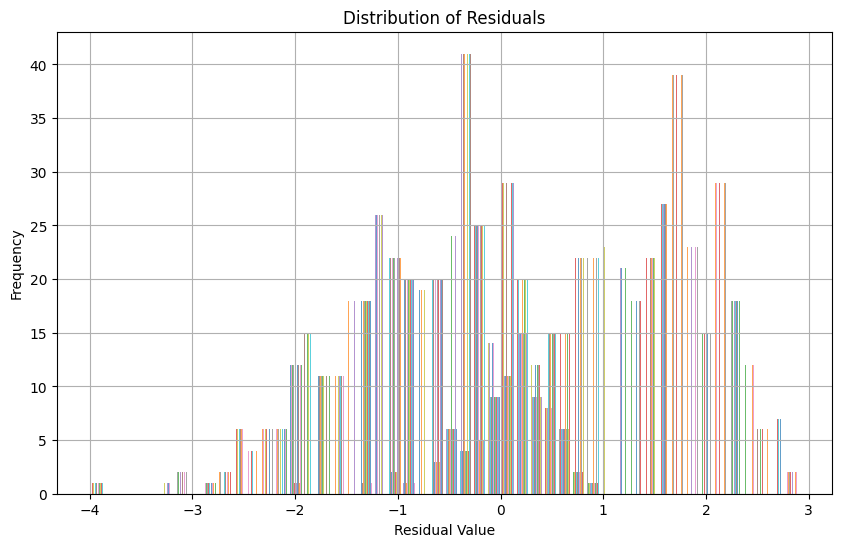

In [49]:
Y_test = test['Potability'].values
Y_pred = model.predict(X_test)


def plot_residuals(Y_true, Y_pred):
    residuals = Y_true - Y_pred
    plt.figure(figsize=(10, 6))
    
    plt.hist(residuals, bins=50, alpha=0.7)
    
    plt.xlabel('Residual Value')
    plt.ylabel('Frequency')
    plt.title('Distribution of Residuals')
    plt.grid(True)
    plt.show()

plot_residuals(Y_test, Y_pred)